<a href="https://colab.research.google.com/github/ParasPuneetSingh/GoogleColab/blob/main/ACM_ML_Inductions_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as mtp
import pandas as pd
import sklearn
from sklearn.cluster import KMeans

In [ ]:
data=pd.read_csv("airbnb_task_dataset.csv")

In [ ]:
data.head(10)

In [ ]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['neighbourhood_group','neighbourhood','room_type'])
print(one_hot_encoded_data.head(5))

   latitude  longitude  price  minimum_nights  number_of_reviews last_review  \
0  40.64749  -73.97237  149.0             1.0                9.0  2018-10-19   
1  40.75362  -73.98377  225.0             1.0               45.0  2019-05-21   
2  40.80902  -73.94190  150.0             3.0                0.0         NaN   
3  40.68514  -73.95976   89.0             1.0              270.0  2019-07-05   
4  40.79851  -73.94399   80.0            10.0                9.0  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                             6.0             365.0   
1               0.38                             2.0             355.0   
2                NaN                             1.0             365.0   
3               4.64                             1.0             194.0   
4               0.10                             1.0               0.0   

   neighbourhood_group_Bronx  ...  neighbourhood_Williamsburg  \
0        

In [ ]:
one_hot_encoded_data['last_review'] = pd.to_datetime(one_hot_encoded_data['last_review'])
X = pd.DataFrame(one_hot_encoded_data)
X = X.drop(['last_review'], axis=1)

In [ ]:
def initialize_random_centroids(K,data):
  (m,n) = np.shape(data)

  centroids=np.empty((K,n))
  for i in range(K):
    centroids[i] = data[np.random.choice(range(m))]
  return centroids

In [ ]:
def distance(x1,x2):
  return np.linalg.norm(x1 - x2)

In [ ]:
def closest_centroid(x,K,centroids):
  distances = np.empty(K)
  for i in range(K):
    distances[i] = distance(x,centroids[i])
  return np.argmin(distances)

In [ ]:
def create_clusters(centroids,data,K):
  m,_=np.shape(data)
  cluster_index = np.empty(m)
  for i in range(m):
    cluster_index[i] = closest_centroid(data[i],K,centroids)
  return cluster_index

In [ ]:
def calc_means(data,K,cluster_index):
  _,n = np.shape(data)
  centroids = np.empty((K,n))
  for i in range(K):
    points = data[cluster_index==i]
    centroids[i] = np.mean(points, axis=0)
  return centroids

In [ ]:
def kmeans(K,data,max_iterations=750):

  centroids = initialize_random_centroids(K,data)

  print(f"initial centroids: {centroids}")

  for _ in range(max_iterations):
    clusters = create_clusters(centroids,data,K)
    previous_centroids = centroids

    centroids = calc_means(data,K,clusters)
    diff = previous_centroids - centroids
    if not diff.any():
      return clusters
  return clusters

In [ ]:
y_pred=kmeans(4,X.to_numpy())

initial centroids: [[ 4.067924e+01 -7.384771e+01  9.900000e+01  3.000000e+00  6.600000e+01
   1.290000e+00  1.000000e+00  1.890000e+02  0.000000e+00  0.000000e+00
   0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   0.000000e+00  0.000000e+00  0.000000e+00  

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning:

invalid value encountered in divide



In [ ]:
pip install plotly

In [ ]:
import pandas as pd
import plotly
import plotly.graph_objs as go


#Read cars data from csv
#data = pd.read_csv("cars.csv")

#Set marker properties
markersize = X['minimum_nights'].fillna(X['minimum_nights'].mean())/2
markercolor = X['number_of_reviews']

#Make Plotly figure
fig1 = go.Scatter3d(x=X['latitude'].astype(float),
                   y=X['longitude'].astype(float),
                   z=X['price'].astype(float),
                    marker=dict(size=markersize,
                                color=markercolor,
                                opacity=0.9,
                                reversescale=True,
                                colorscale='Blues'),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict(title="latitude"),
                     yaxis=dict( title="longitude"),
                     zaxis=dict(title="price")),)

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("5D Plot.html"))

'5D Plot.html'

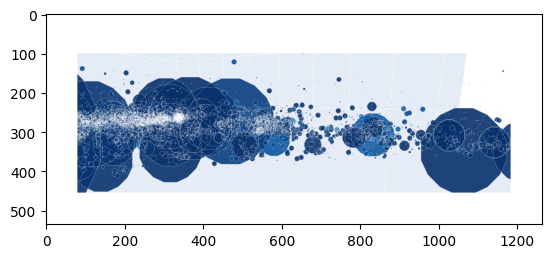

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_path = "/content/newplot.png"
image = mpimg.imread(image_path)
plt.imshow(image)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

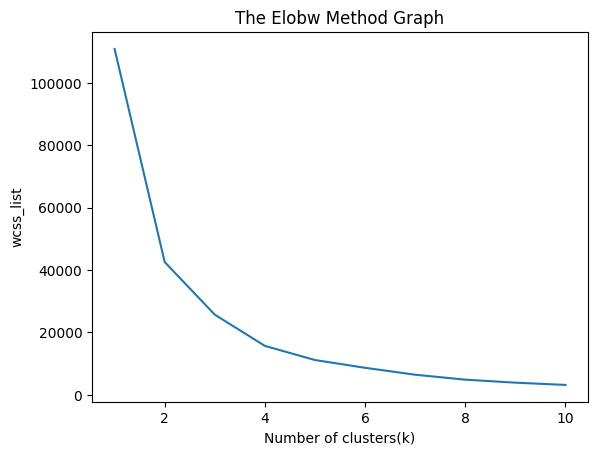

In [ ]:
import numpy as np
import matplotlib.pyplot as mtp
import pandas as pd
import sklearn
data=pd.read_csv("airbnb_task_dataset.csv")
x = data.iloc[:, [2, 9]].values

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=50)
imputer.fit(x)
x = imputer.transform(x)
#one_hot_encoded_data = pd.get_dummies(data, columns = ['neighbourhood_group','neighbourhood','room_type'])
#x = pd.DataFrame(one_hot_encoded_data)
#x = x.drop(['last_review'], axis=1)
#x=x.to_numpy()

from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 10.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
mtp.plot(range(1, 11), wcss_list)
mtp.title('The Elobw Method Graph')
mtp.xlabel('Number of clusters(k)')
mtp.ylabel('wcss_list')
mtp.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



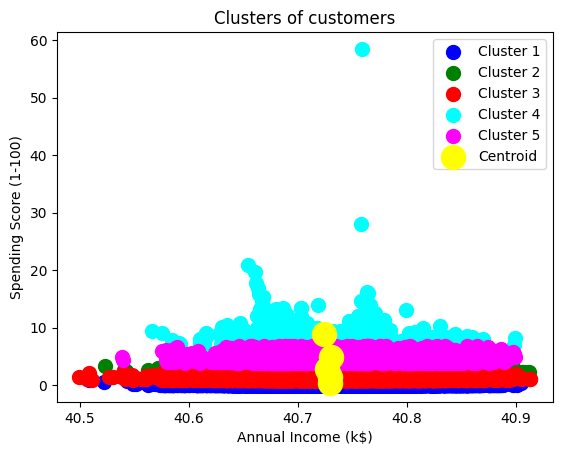

In [ ]:
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')
mtp.title('Clusters of customers')
mtp.xlabel('Annual Income (k$)')
mtp.ylabel('Spending Score (1-100)')
mtp.legend()
mtp.show()